# GANs Clássicas com BreastMNIST

Este notebook demonstra como treinar três variantes de GANs utilizando o dataset **MedMNIST**: **DCGAN**, **Conditional GAN** (CGAN) e **Wasserstein GAN com Gradiente Penalty** (WGAN-GP). O objetivo é gerar imagens sintéticas similares às do conjunto de dados.

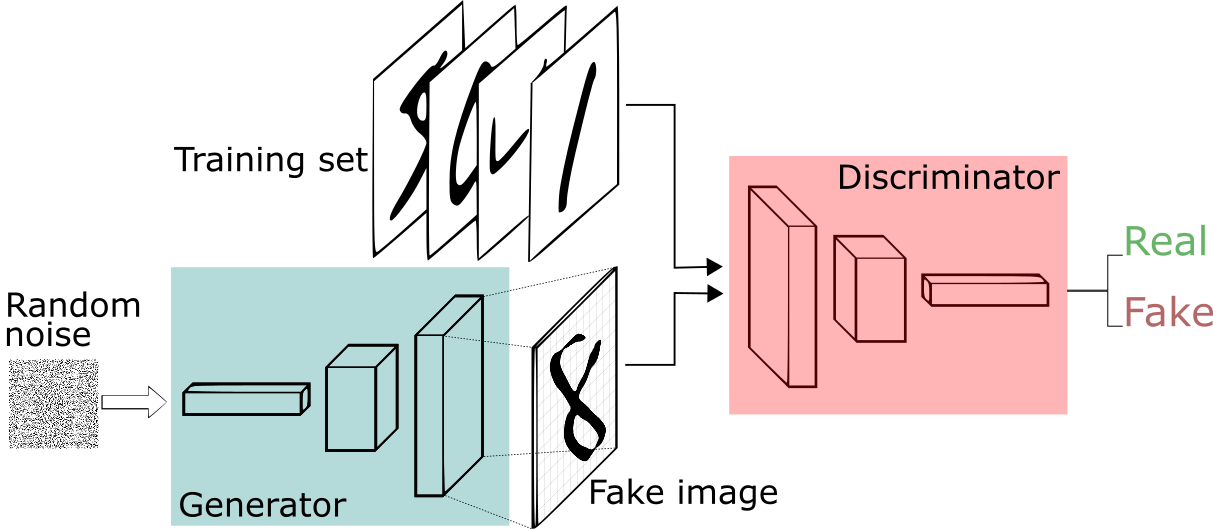!

## 1. Setup e Importações
Instale as dependências necessárias e carregue as principais bibliotecas utilizadas ao longo do notebook.

In [14]:
!pip install torch torchvision medmnist matplotlib torchmetrics seaborn scikit-learn scipy --quiet
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
import medmnist
from medmnist import INFO
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carregamento e Preparação do Dataset

In [15]:
# Seleciona o dataset
DATA_FLAG = 'breastmnist'
info = INFO[DATA_FLAG]
download = True

# Transformações básicas: conversão para tensor e normalização
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Carrega treino e teste
train_dataset = getattr(medmnist, info['python_class'])(split='train', transform=transform, download=download)
test_dataset = getattr(medmnist, info['python_class'])(split='test', transform=transform, download=download)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Using downloaded and verified file: /home/mahlow/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/mahlow/.medmnist/breastmnist.npz


In [16]:
train_dataset

Dataset BreastMNIST of size 28 (breastmnist)
    Number of datapoints: 546
    Root location: /home/mahlow/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0

Using downloaded and verified file: /home/mahlow/.medmnist/breastmnist.npz


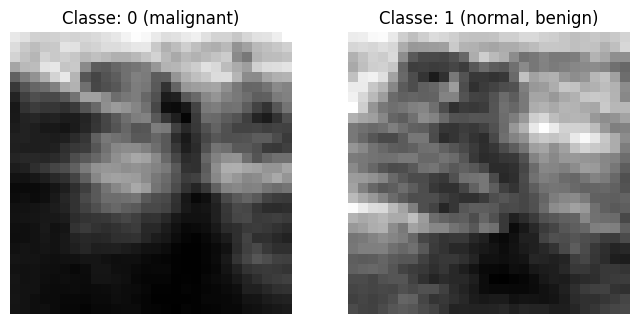

In [17]:
import matplotlib.pyplot as plt
from medmnist import INFO
import medmnist
from torchvision import transforms
from torch.utils.data import DataLoader
import random

# Configurações do dataset
DATA_FLAG = 'breastmnist'
info = INFO[DATA_FLAG]
download = True

# Transformação
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Carrega dataset
train_dataset = getattr(medmnist, info['python_class'])(split='train', transform=transform, download=download)

# Número de classes
num_classes = len(info['label'])

# Agrupa índices por classe
class_indices = {i: [] for i in range(num_classes)}

for idx, (img, target) in enumerate(train_dataset):
    label = int(target.item())
    class_indices[label].append(idx)

# Seleciona um índice aleatório por classe
random_indices = {label: random.choice(indices) for label, indices in class_indices.items()}

# Plot
plt.figure(figsize=(8, 4))
for idx, (label, sample_idx) in enumerate(random_indices.items()):
    img, _ = train_dataset[sample_idx]
    img_disp = img * 0.5 + 0.5  # Desfaz normalização
    img_disp = img_disp.squeeze()
    plt.subplot(1, num_classes, idx + 1)
    plt.imshow(img_disp, cmap='gray')
    plt.title(f'Classe: {label} ({info["label"][str(label)]})')
    plt.axis('off')

plt.show()


In [18]:
from collections import Counter

# Conta as classes no train_dataset
train_labels = [int(label.item()) for _, label in train_dataset]
train_class_counts = Counter(train_labels)

# Conta as classes no test_dataset
test_labels = [int(label.item()) for _, label in test_dataset]
test_class_counts = Counter(test_labels)

# Exibe resultado para o train_dataset
print("Distribuição no conjunto de treino:")
for cls, count in sorted(train_class_counts.items()):
    nome = train_dataset.info['label'][str(cls)]
    print(f"Classe {cls} ({nome}): {count} amostras")

print("\nDistribuição no conjunto de teste:")
# Exibe resultado para o test_dataset
for cls, count in sorted(test_class_counts.items()):
    nome = test_dataset.info['label'][str(cls)]
    print(f"Classe {cls} ({nome}): {count} amostras")


Distribuição no conjunto de treino:
Classe 0 (malignant): 147 amostras
Classe 1 (normal, benign): 399 amostras

Distribuição no conjunto de teste:
Classe 0 (malignant): 42 amostras
Classe 1 (normal, benign): 114 amostras


## 3. Implementações das GANs
A seguir estão as implementações dos três modelos de GAN.

### DCGAN

## DCGAN (Deep Convolutional Generative Adversarial Network)

- É um tipo de Generative Adversarial Network (GAN) que utiliza redes convolucionais profundas.
- O gerador usa camadas convolucionais transpostas para criar imagens a partir de vetores de ruído.
- O discriminador é uma rede convolucional que distingue imagens reais de imagens geradas.
- Substitui camadas de pooling por camadas convolucionais com stride para melhor aprendizado espacial.

In [19]:
from classical_gans import (
    DCGenerator,
    DCDiscriminator,
    CGANGenerator,
    CGANDiscriminator,
    WGANGPGenerator,
    WGANGPCritic,
    train_gan_for_class,
    train_gan_for_class_with_loss,
    train_cgan,
    train_wgangp,
)


## 4. Loop de Treinamento
Modelo simplificado para treinar cada uma das GANs. Ajuste hiperparâmetros conforme necessário.

In [20]:
# Implementações das GANs clássicas importadas do módulo classical_gans.py


In [ ]:
latent_dim = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
G = DCGenerator(latent_dim=latent_dim).to(device)
D = DCDiscriminator(img_channels=1).to(device)


G_mal = DCGenerator(latent_dim=latent_dim).to(device)
D_mal = DCDiscriminator(img_channels=1).to(device)
malignant_G = train_gan_for_class(train_loader, label_target=0, G=G_mal, D=D_mal, latent_dim=latent_dim, num_epochs=50, device=device)

G_ben = DCGenerator(latent_dim=latent_dim).to(device)
D_ben = DCDiscriminator(img_channels=1).to(device)
benign_G = train_gan_for_class(train_loader, label_target=1, G=G_ben, D=D_ben, latent_dim=latent_dim, num_epochs=50, device=device)

Epoch 1/50 - Loss D: 1.051 | Loss G: 1.033
Epoch 2/50 - Loss D: 0.452 | Loss G: 1.822
Epoch 3/50 - Loss D: 0.350 | Loss G: 2.032
Epoch 4/50 - Loss D: 0.254 | Loss G: 2.376
Epoch 5/50 - Loss D: 0.203 | Loss G: 2.658
Epoch 6/50 - Loss D: 0.167 | Loss G: 2.802
Epoch 7/50 - Loss D: 0.170 | Loss G: 2.833
Epoch 8/50 - Loss D: 0.174 | Loss G: 3.104
Epoch 9/50 - Loss D: 0.191 | Loss G: 3.019
Epoch 10/50 - Loss D: 0.250 | Loss G: 2.860
Epoch 11/50 - Loss D: 0.210 | Loss G: 3.024
Epoch 12/50 - Loss D: 0.284 | Loss G: 2.616
Epoch 13/50 - Loss D: 0.618 | Loss G: 2.485
Epoch 14/50 - Loss D: 0.352 | Loss G: 2.495
Epoch 15/50 - Loss D: 0.367 | Loss G: 2.697
Epoch 16/50 - Loss D: 0.550 | Loss G: 2.762
Epoch 17/50 - Loss D: 0.477 | Loss G: 2.113
Epoch 18/50 - Loss D: 0.430 | Loss G: 2.845
Epoch 19/50 - Loss D: 0.763 | Loss G: 1.759
Epoch 20/50 - Loss D: 0.538 | Loss G: 2.295
Epoch 21/50 - Loss D: 0.556 | Loss G: 1.793
Epoch 22/50 - Loss D: 0.709 | Loss G: 2.166
Epoch 23/50 - Loss D: 0.663 | Loss G: 1.8

In [41]:
import matplotlib.pyplot as plt
import torch
import random

def compare_generated_real_grid(malignant_G, benign_G, latent_dim, device, dataset, num_samples=3):
    malignant_G.eval()
    benign_G.eval()

    # Gera amostras sintéticas
    noise_mal = torch.randn(num_samples, latent_dim, 1, 1, device=device)
    noise_ben = torch.randn(num_samples, latent_dim, 1, 1, device=device)

    with torch.no_grad():
        fake_mal = malignant_G(noise_mal).cpu()
        fake_ben = benign_G(noise_ben).cpu()

    # Coleta todos os reais disponíveis em listas
    real_mal_all = [img for img, label in dataset if int(label.item()) == 0]
    real_ben_all = [img for img, label in dataset if int(label.item()) == 1]

    # Escolhe amostras aleatórias
    real_mal = random.sample(real_mal_all, num_samples)
    real_ben = random.sample(real_ben_all, num_samples)

    # Plot com bordas simuladas
    fig, axes = plt.subplots(nrows=num_samples, ncols=4, figsize=(12, 3 * num_samples))

    for i in range(num_samples):
        imgs = [
            fake_mal[i].squeeze() * 0.5 + 0.5,
            real_mal[i].squeeze() * 0.5 + 0.5,
            fake_ben[i].squeeze() * 0.5 + 0.5,
            real_ben[i].squeeze() * 0.5 + 0.5
        ]
        titles = ["Gerada Malignant", "Real Malignant", "Gerada Benign", "Real Benign"]

        for j in range(4):
            ax = axes[i, j]
            ax.imshow(imgs[j], cmap='gray')
            ax.set_xticks([])
            ax.set_yticks([])
            for side in ['top', 'bottom', 'left', 'right']:
                ax.spines[side].set_visible(True)
                ax.spines[side].set_linewidth(1)
            if i == 0:
                ax.set_title(titles[j], fontsize=10)

    plt.tight_layout()
    plt.show()


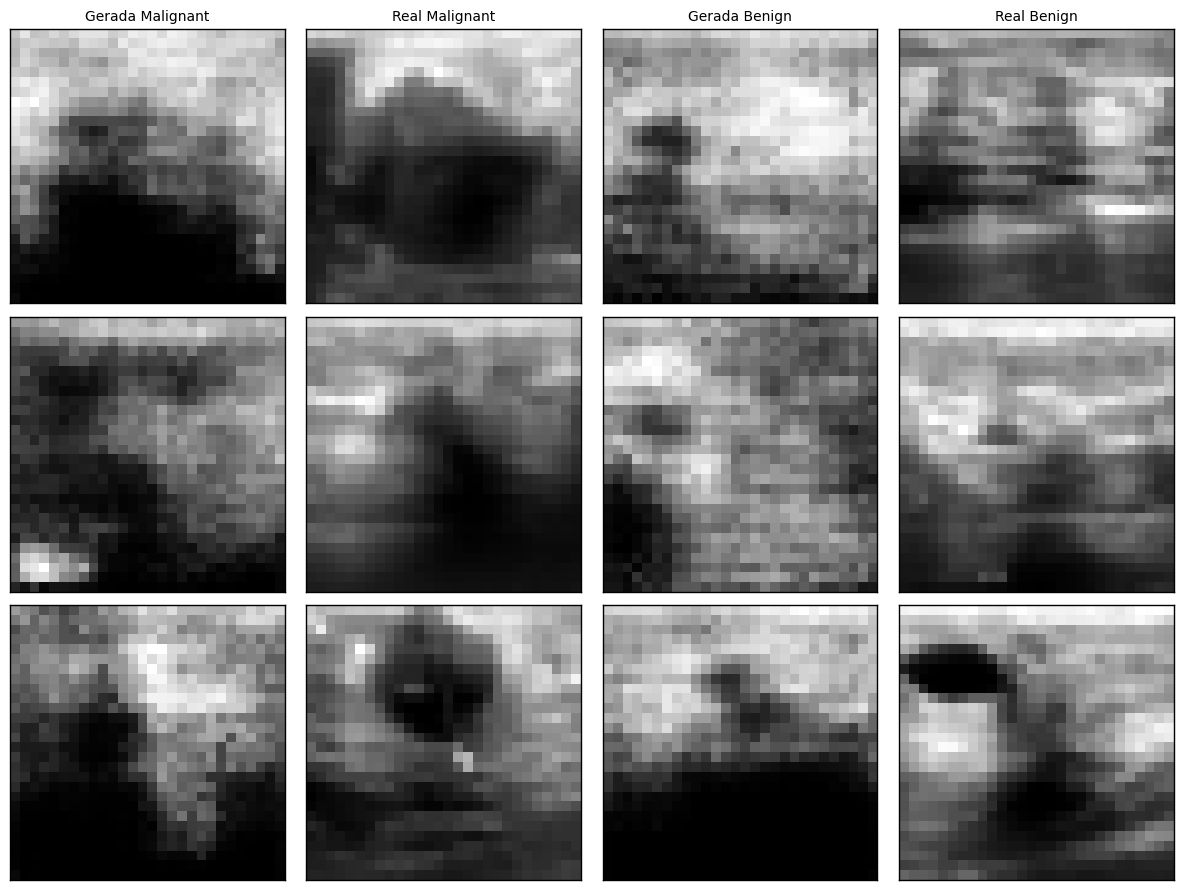

In [42]:
compare_generated_real_grid( 
    malignant_G=G_mal,
    benign_G=G_ben,
    latent_dim=latent_dim,
    device=device,
    dataset=train_dataset
)

## 5. Avaliação com Métricas
Avaliamos as imagens geradas utilizando as métricas **FID** e **Inception Score**, disponíveis no pacote `torchmetrics`.

### Frechet Inception Distance (FID)


$\mathrm{FID} = \|\mu_r - \mu_g\|^2 + \operatorname{Tr}\left( \Sigma_r + \Sigma_g - 2 \left( \Sigma_r \Sigma_g \right)^{1/2} \right)$


onde:
- $\mu_r$ = média das features reais
- $\mu_g$ = média das features geradas
- $\Sigma_r$ = covariância das features reais
- $\Sigma_g$ = covariância das features geradas

---

### Inception Score (IS)

$ \mathrm{IS} = \exp \left( \mathbb{E}_x \left[ D_{\mathrm{KL}}\left( p(y|x) \;||\; p(y) \right) \right] \right) $

onde:
- $p(y|x)$ = distribuição predita para a imagem gerada
- $p(y)$ = distribuição marginal $p(y) = \int p(y|x) p(x) dx$
- $\mathbb{E}_x$: valor esperado sobre as imagens geradas (média)
- $D_{\mathrm{KL}}$: divergência de Kullback-Leibler


In [43]:
import torch
from torchmetrics.image.fid import FrechetInceptionDistance
from torchmetrics.image.inception import InceptionScore
import torch.nn.functional as F
import pandas as pd

def evaluate_gan(G, latent_dim, device, dataset, label_target, gan_name, gen_label_name, batch_size=64, max_batches=10):
    fid = FrechetInceptionDistance(feature=64).to(device)
    is_metric = InceptionScore().to(device)

    G.eval()
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    with torch.no_grad():
        batch_count = 0
        for real, labels in loader:
            mask = (labels.squeeze() == label_target)
            if mask.sum() == 0:
                continue
            real = real[mask].to(device)

            b_size = real.size(0)
            if b_size == 0:
                continue

            noise = torch.randn(b_size, latent_dim, 1, 1, device=device)

            # Checa se o gerador é CGAN
            if gan_name == 'CGAN':
                gen_labels = torch.full((b_size,), label_target, device=device, dtype=torch.long)
                fake = G(noise, gen_labels)
            else:
                fake = G(noise)

            # Escala para [0, 255]
            real_uint8 = ((real * 0.5 + 0.5) * 255).clamp(0, 255).to(torch.uint8)
            fake_uint8 = ((fake * 0.5 + 0.5) * 255).clamp(0, 255).to(torch.uint8)

            # Corrige para 3 canais
            real_uint8 = real_uint8.repeat(1, 3, 1, 1)
            fake_uint8 = fake_uint8.repeat(1, 3, 1, 1)

            fid.update(real_uint8, real=True)
            fid.update(fake_uint8, real=False)
            is_metric.update(fake_uint8)

            batch_count += 1
            if batch_count >= max_batches:
                break

    fid_score = fid.compute().item()
    is_mean, is_std = is_metric.compute()
    is_mean = is_mean.item()
    is_std = is_std.item()

    return {
        'GAN': gan_name,
        'Generator_Label': gen_label_name.capitalize(),
        'Real_Label': 'Malignant' if label_target == 0 else 'Benign',
        'FID': fid_score,
        'IS_Mean': is_mean,
        'IS_Std': is_std
    }


results = []

# Malignant G -> real Malignant
res = evaluate_gan(G_mal, latent_dim, device, train_dataset, 0, 'DCGAN', 'malignant')
results.append(res)

# Malignant G -> real Benign (cruzado)
res = evaluate_gan(G_mal, latent_dim, device, train_dataset, 1, 'DCGAN', 'malignant')
results.append(res)

# Benign G -> real Benign
res = evaluate_gan(G_ben, latent_dim, device, train_dataset, 1, 'DCGAN', 'benign')
results.append(res)

# Benign G -> real Malignant (cruzado)
res = evaluate_gan(G_ben, latent_dim, device, train_dataset, 0, 'DCGAN', 'benign')
results.append(res)

# DataFrame
df_results = pd.DataFrame(results)
df_results

/home/mahlow/anaconda3/envs/my_env/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


,GAN,Generator_Label,Real_Label,FID,IS_Mean,IS_Std
0,DCGAN,Malignant,Malignant,0.558579,1.632140,0.162567
1,DCGAN,Malignant,Benign,1.012545,1.801362,0.088113
2,DCGAN,Benign,Benign,0.372723,1.737239,0.106643
3,DCGAN,Benign,Malignant,0.199056,1.661133,0.170173


## 6. Comparando Modelos

### Conditional GAN

- É uma extensão da GAN que permite condicionar a geração de amostras a informações adicionais (por exemplo, rótulos de classe).
- Tanto o gerador quanto o discriminador recebem como entrada a variável de condição (ex.: o rótulo da classe).
- O gerador cria imagens que buscam corresponder à condição fornecida.
- O discriminador avalia se a imagem é real ou falsa levando em conta essa condição.
- Permite maior controle sobre o tipo de dado gerado, tornando possível direcionar a geração para classes específicas.

In [44]:
# Implementações das GANs clássicas importadas do módulo classical_gans.py


### WGAN-GP

## Wasserstein GAN com Gradiente Penalty (WGAN-GP)

- É uma variante dos GANs que usa a distância de Wasserstein como métrica de diferença entre as distribuições real e gerada.
- Substitui o discriminador tradicional por um "critic", que não usa função sigmoide na saída e retorna um valor escalar para medir a qualidade das amostras.

In [45]:
# Implementações das GANs clássicas importadas do módulo classical_gans.py


In [46]:
import torch
from torchmetrics.image.fid import FrechetInceptionDistance
from torchmetrics.image.inception import InceptionScore
import pandas as pd
import torch.nn.functional as F
import time

# ========== Configurações ==========
latent_dim = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_epochs = 50
num_classes = 2  # Malignant=0, Benign=1

# ========== Treinamento e armazenamento dos geradores ==========
G_dc_dict = {}
G_cg_dict = {}
G_wg_dict = {}
gan_training_stats = []

# DCGAN
dcgan_start_time = time.time()
for label_target, label_name in zip([0, 1], ['malignant', 'benign']):
    G_dc = DCGenerator(latent_dim=latent_dim).to(device)
    D_dc = DCDiscriminator(img_channels=1).to(device)
    G_dc_trained = train_gan_for_class(
        train_loader=train_loader,
        label_target=label_target,
        G=G_dc,
        D=D_dc,
        latent_dim=latent_dim,
        num_epochs=num_epochs,
        device=device
    )
    G_dc_dict[label_name] = G_dc_trained

dcgan_total_time = time.time() - dcgan_start_time
if G_dc_dict:
    dcgan_generator_example = next(iter(G_dc_dict.values()))
    dcgan_generator_params = sum(p.numel() for p in dcgan_generator_example.parameters())
    dcgan_discriminator_params = sum(p.numel() for p in DCDiscriminator(img_channels=1).parameters())
    gan_training_stats.append({
        "GAN": "DCGAN",
        "Tempo_treinamento_seg": dcgan_total_time,
        "Tempo_treinamento_min": dcgan_total_time / 60,
        "Parametros_Gerador": dcgan_generator_params,
        "Parametros_Discriminador_Critic": dcgan_discriminator_params,
        "Parametros_Totais": dcgan_generator_params + dcgan_discriminator_params,
    })

# CGAN
cgan_start_time = time.time()
for label_target, label_name in zip([0, 1], ['malignant', 'benign']):
    G_cg = CGANGenerator(latent_dim=latent_dim, num_classes=num_classes, img_channels=1).to(device)
    D_cg = CGANDiscriminator(num_classes=num_classes, img_channels=1).to(device)
    G_cg_trained = train_cgan(
        train_loader=train_loader,
        G=G_cg,
        D=D_cg,
        latent_dim=latent_dim,
        num_classes=num_classes,
        num_epochs=num_epochs,
        device=device,
        label_target=label_target
    )
    G_cg_dict[label_name] = G_cg_trained

cgan_total_time = time.time() - cgan_start_time
if G_cg_dict:
    cgan_generator_example = next(iter(G_cg_dict.values()))
    cgan_generator_params = sum(p.numel() for p in cgan_generator_example.parameters())
    cgan_discriminator_params = sum(p.numel() for p in CGANDiscriminator(num_classes=num_classes, img_channels=1).parameters())
    gan_training_stats.append({
        "GAN": "CGAN",
        "Tempo_treinamento_seg": cgan_total_time,
        "Tempo_treinamento_min": cgan_total_time / 60,
        "Parametros_Gerador": cgan_generator_params,
        "Parametros_Discriminador_Critic": cgan_discriminator_params,
        "Parametros_Totais": cgan_generator_params + cgan_discriminator_params,
    })

# WGAN-GP
wgan_start_time = time.time()
for label_target, label_name in zip([0, 1], ['malignant', 'benign']):
    G_wg = WGANGPGenerator(latent_dim=latent_dim, img_channels=1).to(device)
    D_wg = WGANGPCritic(img_channels=1).to(device)
    G_wg_trained = train_wgangp(
        train_loader=train_loader,
        G=G_wg,
        D=D_wg,
        latent_dim=latent_dim,
        num_epochs=num_epochs,
        device=device,
        label_target=label_target
    )
    G_wg_dict[label_name] = G_wg_trained

wgan_total_time = time.time() - wgan_start_time
if G_wg_dict:
    wgan_generator_example = next(iter(G_wg_dict.values()))
    wgan_generator_params = sum(p.numel() for p in wgan_generator_example.parameters())
    wgan_critic_params = sum(p.numel() for p in WGANGPCritic(img_channels=1).parameters())
    gan_training_stats.append({
        "GAN": "WGAN-GP",
        "Tempo_treinamento_seg": wgan_total_time,
        "Tempo_treinamento_min": wgan_total_time / 60,
        "Parametros_Gerador": wgan_generator_params,
        "Parametros_Discriminador_Critic": wgan_critic_params,
        "Parametros_Totais": wgan_generator_params + wgan_critic_params,
    })


Epoch 1/50 - Loss D: 0.783 | Loss G: 1.383
Epoch 2/50 - Loss D: 0.315 | Loss G: 2.213
Epoch 3/50 - Loss D: 0.270 | Loss G: 2.346
Epoch 4/50 - Loss D: 0.219 | Loss G: 2.765
Epoch 5/50 - Loss D: 0.132 | Loss G: 3.117
Epoch 6/50 - Loss D: 0.102 | Loss G: 3.338
Epoch 7/50 - Loss D: 0.074 | Loss G: 3.647
Epoch 8/50 - Loss D: 0.057 | Loss G: 3.899
Epoch 9/50 - Loss D: 0.043 | Loss G: 4.212
Epoch 10/50 - Loss D: 0.034 | Loss G: 4.391
Epoch 11/50 - Loss D: 0.025 | Loss G: 4.652
Epoch 12/50 - Loss D: 0.023 | Loss G: 4.734
Epoch 13/50 - Loss D: 0.024 | Loss G: 4.539
Epoch 14/50 - Loss D: 0.132 | Loss G: 4.079
Epoch 15/50 - Loss D: 0.073 | Loss G: 4.104
Epoch 16/50 - Loss D: 0.035 | Loss G: 4.455
Epoch 17/50 - Loss D: 0.028 | Loss G: 4.800
Epoch 18/50 - Loss D: 0.021 | Loss G: 4.975
Epoch 19/50 - Loss D: 0.013 | Loss G: 5.255
Epoch 20/50 - Loss D: 0.011 | Loss G: 5.540
Epoch 21/50 - Loss D: 0.010 | Loss G: 5.549
Epoch 22/50 - Loss D: 0.010 | Loss G: 5.473
Epoch 23/50 - Loss D: 0.010 | Loss G: 5.5

### Métricas de tempo e parâmetros das GANs
Nesta seção consolidamos o tempo total de treinamento e a quantidade de parâmetros de cada arquitetura clássica utilizada.


In [ ]:
gan_training_stats_df = pd.DataFrame(gan_training_stats)
gan_training_stats_df


In [47]:
import torch
from torch.utils.data import DataLoader
from torchmetrics.image.fid import FrechetInceptionDistance
from torchmetrics.image.inception import InceptionScore

def evaluate_gan(
    G,
    latent_dim,
    device,
    dataset,
    label_target,
    gan_name,
    gen_label_name,
    max_batches: float = float('inf'),
    batch_size: int = 64
):
   
    fid = FrechetInceptionDistance(feature=64).to(device)
    is_metric = InceptionScore().to(device)

    G.eval()
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    batch_count = 0
    with torch.no_grad():
        for real, labels in loader:
            # filtra só a classe desejada
            mask = (labels.squeeze() == label_target)
            if mask.sum() == 0:
                continue

            real = real[mask].to(device)
            b_size = real.size(0)
            if b_size == 0:
                continue

            # amostra ruído e gera
            noise = torch.randn(b_size, latent_dim, 1, 1, device=device)
            if gan_name == 'CGAN':
                gen_labels = torch.full((b_size,), label_target, device=device)
                fake = G(noise, gen_labels)
            else:
                fake = G(noise)

            # converte para uint8 3-canais [0..255]
            real_uint8 = ((real * 0.5 + 0.5) * 255).clamp(0, 255).to(torch.uint8)
            fake_uint8 = ((fake * 0.5 + 0.5) * 255).clamp(0, 255).to(torch.uint8)
            real_uint8 = real_uint8.repeat(1, 3, 1, 1)
            fake_uint8 = fake_uint8.repeat(1, 3, 1, 1)

            # atualiza métricas
            fid.update(real_uint8, real=True)
            fid.update(fake_uint8, real=False)
            is_metric.update(fake_uint8)

            batch_count += 1
            if batch_count >= max_batches:
                break

    # 2) Após processar todos os batches, calcula scores finais
    fid_score = fid.compute().item()
    is_mean, is_std = is_metric.compute()
    is_mean = is_mean.item()
    is_std = is_std.item()

    return {
        'GAN': gan_name,
        'Generator_Label': gen_label_name.capitalize(),
        'Real_Label': 'Malignant' if label_target == 0 else 'Benign',
        'FID': fid_score,
        'IS_Mean': is_mean,
        'IS_Std': is_std
    }


# ========== Avaliação ==========
results = []

# Lista dos geradores e os targets corretos
generators = [
    {'gan': 'DCGAN', 'gen_label': 'malignant', 'G': G_dc_dict['malignant'], 'target': 0},
    {'gan': 'DCGAN', 'gen_label': 'benign', 'G': G_dc_dict['benign'], 'target': 1},
    {'gan': 'CGAN', 'gen_label': 'malignant', 'G': G_cg_dict['malignant'], 'target': 0},
    {'gan': 'CGAN', 'gen_label': 'benign', 'G': G_cg_dict['benign'], 'target': 1},
    {'gan': 'WGAN-GP', 'gen_label': 'malignant', 'G': G_wg_dict['malignant'], 'target': 0},
    {'gan': 'WGAN-GP', 'gen_label': 'benign', 'G': G_wg_dict['benign'], 'target': 1},
]

# Avalia apenas o par gerador / real da mesma classe
for item in generators:
    res = evaluate_gan(
        G=item['G'],
        latent_dim=latent_dim,
        device=device,
        dataset=train_dataset,
        label_target=item['target'],  # apenas o target correto
        gan_name=item['gan'],
        gen_label_name=item['gen_label']
    )
    results.append(res)

# ========== DataFrame final ==========
df_results = pd.DataFrame(results)
df_results


/home/mahlow/anaconda3/envs/my_env/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


,GAN,Generator_Label,Real_Label,FID,IS_Mean,IS_Std
0,DCGAN,Malignant,Malignant,1.443166,1.317264,0.054181
1,DCGAN,Benign,Benign,0.338341,1.609287,0.100924
2,CGAN,Malignant,Malignant,0.096865,1.694385,0.219879
3,CGAN,Benign,Benign,0.507936,1.774795,0.104334
4,WGAN-GP,Malignant,Malignant,2.227197,1.668189,0.169032
5,WGAN-GP,Benign,Benign,7.251258,1.471959,0.050516


## Gráfico de Loss das GANs

In [48]:
# Implementações das GANs clássicas importadas do módulo classical_gans.py


Epoch 1/50 - Loss D: 0.992 | Loss G: 1.141
Epoch 2/50 - Loss D: 0.418 | Loss G: 1.933
Epoch 3/50 - Loss D: 0.229 | Loss G: 2.521
Epoch 4/50 - Loss D: 0.218 | Loss G: 2.543
Epoch 5/50 - Loss D: 0.192 | Loss G: 2.861
Epoch 6/50 - Loss D: 0.150 | Loss G: 3.102
Epoch 7/50 - Loss D: 0.094 | Loss G: 3.474
Epoch 8/50 - Loss D: 0.095 | Loss G: 3.548
Epoch 9/50 - Loss D: 0.075 | Loss G: 3.929
Epoch 10/50 - Loss D: 0.102 | Loss G: 3.771
Epoch 11/50 - Loss D: 0.075 | Loss G: 3.745
Epoch 12/50 - Loss D: 0.144 | Loss G: 3.523
Epoch 13/50 - Loss D: 0.136 | Loss G: 3.560
Epoch 14/50 - Loss D: 0.175 | Loss G: 3.707
Epoch 15/50 - Loss D: 0.173 | Loss G: 3.483
Epoch 16/50 - Loss D: 0.213 | Loss G: 3.369
Epoch 17/50 - Loss D: 0.225 | Loss G: 3.490
Epoch 18/50 - Loss D: 0.138 | Loss G: 3.663
Epoch 19/50 - Loss D: 0.177 | Loss G: 3.141
Epoch 20/50 - Loss D: 0.829 | Loss G: 3.213
Epoch 21/50 - Loss D: 0.536 | Loss G: 2.379
Epoch 22/50 - Loss D: 0.348 | Loss G: 2.568
Epoch 23/50 - Loss D: 0.306 | Loss G: 2.5

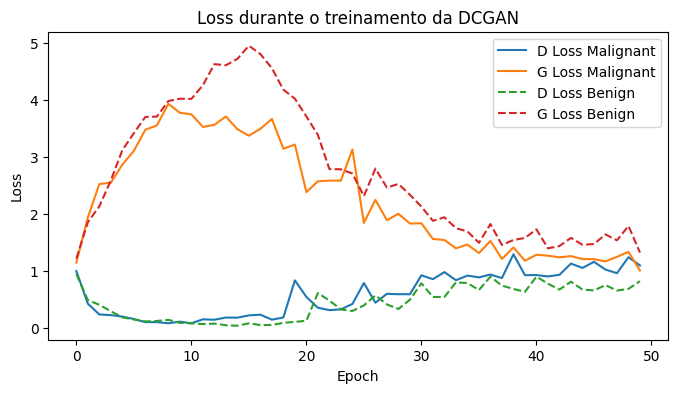

In [14]:
# Exemplo de treinamento registrando as losses
device='cuda' if torch.cuda.is_available() else 'cpu'
latent_dim = 100
num_epochs = 50
losses_dc = {}
G_mal = DCGenerator(latent_dim=latent_dim).to(device)
D_mal = DCDiscriminator(img_channels=1).to(device)
malignant_G, loss_D_mal, loss_G_mal = train_gan_for_class_with_loss(train_loader, 0, G_mal, D_mal, latent_dim, num_epochs, device)

G_ben = DCGenerator(latent_dim=latent_dim).to(device)
D_ben = DCDiscriminator(img_channels=1).to(device)
benign_G, loss_D_ben, loss_G_ben = train_gan_for_class_with_loss(train_loader, 1, G_ben, D_ben, latent_dim, num_epochs, device)

plt.figure(figsize=(8,4))
plt.plot(loss_D_mal, label='D Loss Malignant')
plt.plot(loss_G_mal, label='G Loss Malignant')
plt.plot(loss_D_ben, label='D Loss Benign', linestyle='--')
plt.plot(loss_G_ben, label='G Loss Benign', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss durante o treinamento da DCGAN')
plt.show()


## Classificação com ResNet-18

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import ConcatDataset, DataLoader, Dataset, random_split
from torchvision.models import resnet18
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

# --- collate_fn e SyntheticDataset inalterados ---
def custom_collate_fn(batch):
    xs, ys = zip(*batch)
    xs = torch.stack(xs, dim=0)
    ys_list = []
    for y in ys:
        if isinstance(y, torch.Tensor):
            val = y.item() if y.numel() == 1 else int(y.argmax().item())
        else:
            val = int(y)
        ys_list.append(val)
    ys = torch.tensor(ys_list, dtype=torch.long)
    return xs, ys

class SyntheticDataset(Dataset):
    def __init__(self, generator_dict, num_per_class, latent_dim, device=None):
        self.samples = []
        device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        for label_name, gen in generator_dict.items():
            label = 0 if label_name == 'malignant' else 1
            noise = torch.randn(num_per_class, latent_dim, 1, 1, device=device)
            with torch.no_grad():
                imgs = gen(noise).cpu()
            for img in imgs:
                self.samples.append((img, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

# --- Funções de treino e avaliação inalteradas ---
def train_model(model, loader, epochs=5, device=None):
    device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    for epoch in range(epochs):
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = F.cross_entropy(out, y)
            loss.backward()
            optimizer.step()

def evaluate(model, loader, device=None):
    device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            out = model(x)
            preds = out.argmax(dim=1).cpu()
            all_preds.append(preds)
            all_labels.append(y)

    y_true = torch.cat(all_labels).numpy()
    y_pred = torch.cat(all_preds).numpy()

    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_pred)
    except ValueError:
        auc = float('nan')

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return acc, prec, rec, f1, auc, tn, fp, fn, tp

# --- Função principal modificada ---
def run_experiments(train_dataset, test_dataset, G_dc_dict, latent_dim,
                    batch_size=32, epochs=5, device=None):
    device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
    ratios = [0.0, 0.25, 0.5, 0.75, 1.0, 1.5]
    results = []

    print("\n=== Experimentos com mistura real + sintético ===\n")
    for r in ratios:
        if r == 0.0:
            ds = train_dataset
            print(f"Ratio {r:.2f}: sem dados sintéticos (apenas reais)")
        else:
            num_syn = int(len(train_dataset) * r)
            num_per_class = num_syn // 2
            syn_ds = SyntheticDataset(G_dc_dict, num_per_class, latent_dim, device)
            ds = ConcatDataset([train_dataset, syn_ds])

            print(f"Ratio {r:.2f}: {num_syn} sintéticas no total "
                  f"({num_per_class} por classe)")

        loader = DataLoader(ds, batch_size=batch_size, shuffle=True,
                            collate_fn=custom_collate_fn)

        model = resnet18(num_classes=2)
        model.conv1 = nn.Conv2d(1, 64, 7, 2, 3, bias=False)

        train_model(model, loader, epochs=epochs, device=device)

        test_loader = DataLoader(test_dataset, batch_size=batch_size,
                                 shuffle=False, collate_fn=custom_collate_fn)

        acc, prec, rec, f1, auc, tn, fp, fn, tp = evaluate(
            model, test_loader, device=device
        )

        results.append({
            'ratio': r,
            'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'auc': auc, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp
        })

    print("\n=== Treino 100% sintético → Teste real ===")
    syn_only_ds = SyntheticDataset(G_dc_dict, len(train_dataset)//2, latent_dim, device)
    print(f"Total de sintéticas geradas: {len(syn_only_ds)} "
          f"({len(syn_only_ds)//2} por classe)\n")

    syn_loader  = DataLoader(syn_only_ds, batch_size=batch_size, shuffle=True,
                             collate_fn=custom_collate_fn)
    model = resnet18(num_classes=2)
    model.conv1 = nn.Conv2d(1, 64, 7, 2, 3, bias=False)
    train_model(model, syn_loader, epochs=epochs, device=device)

    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                             collate_fn=custom_collate_fn)
    acc, prec, rec, f1, auc, tn, fp, fn, tp = evaluate(model, test_loader, device=device)
    results.append({
        'ratio': '100%_sintético→real', 'acc': acc, 'prec': prec, 'rec': rec,
        'f1': f1, 'auc': auc, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp
    })

    print("\n=== Treino/Teste 100% sintético (70/30) ===")
    total_syn = len(syn_only_ds)
    n_train   = int(total_syn * 0.7)
    n_test    = total_syn - n_train
    print(f"Total: {total_syn} (treino: {n_train}, teste: {n_test})\n")

    syn_train_ds, syn_test_ds = random_split(syn_only_ds, [n_train, n_test])
    train_loader = DataLoader(syn_train_ds, batch_size=batch_size, shuffle=True,
                              collate_fn=custom_collate_fn)
    test_loader  = DataLoader(syn_test_ds,  batch_size=batch_size, shuffle=False,
                              collate_fn=custom_collate_fn)
    model = resnet18(num_classes=2)
    model.conv1 = nn.Conv2d(1, 64, 7, 2, 3, bias=False)
    train_model(model, train_loader, epochs=epochs, device=device)
    acc, prec, rec, f1, auc, tn, fp, fn, tp = evaluate(model, test_loader, device=device)
    results.append({
        'ratio': '100%_sintético_70/30_selftest', 'acc': acc, 'prec': prec,
        'rec': rec, 'f1': f1, 'auc': auc, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp
    })

    return pd.DataFrame(results)


In [50]:
# Executa e exibe
results_df = run_experiments(train_dataset, test_dataset,
                             G_dc_dict, latent_dim,
                             batch_size=64, epochs=5)
results_df


=== Experimentos com mistura real + sintético ===

Ratio 0.00: sem dados sintéticos (apenas reais)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.25: 136 sintéticas no total (68 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.50: 273 sintéticas no total (136 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.75: 409 sintéticas no total (204 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.00: 546 sintéticas no total (273 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.50: 819 sintéticas no total (409 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino 100% sintético → Teste real ===
Total de sintéticas geradas: 546 (273 por classe)



/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino/Teste 100% sintético (70/30) ===
Total: 546 (treino: 382, teste: 164)



,ratio,acc,prec,rec,f1,auc,tn,fp,fn,tp
0,0.0,0.750000,0.921348,0.719298,0.807882,0.776316,35,7,32,82
1,0.25,0.814103,0.929293,0.807018,0.863850,0.820175,35,7,22,92
2,0.5,0.839744,0.861789,0.929825,0.894515,0.762531,25,17,8,106
3,0.75,0.788462,0.909091,0.789474,0.845070,0.787594,33,9,24,90
4,1.0,0.833333,0.833333,0.964912,0.894309,0.720551,20,22,4,110
5,1.5,0.814103,0.805755,0.982456,0.885375,0.669799,15,27,2,112
6,100%_sintético→real,0.730769,0.730769,1.000000,0.844444,0.500000,0,42,0,114
7,100%_sintético_70/30_selftest,0.835366,0.750000,1.000000,0.857143,0.837349,56,27,0,81


## Balanceamento de Classes com Dados Sintéticos da Classe 0

Treina um classificador acrescentando gradualmente amostras geradas pela GAN apenas da classe 0 até que o conjunto de treino fique balanceado.
O conjunto de teste permanece inalterado.


In [51]:
import torch
import torch.nn as nn
from torch.utils.data import ConcatDataset, TensorDataset, DataLoader
from torchvision.models import resnet18
import pandas as pd
import numpy as np

def _to_scalar(y):
    if isinstance(y, torch.Tensor):
        return int(y.detach().view(-1)[0].item())
    y_np = np.asarray(y)
    return int(y_np.reshape(-1)[0].item())

def balance_class0_experiment(
    train_dataset, test_dataset, G_class0, latent_dim,
    step_ratio=0.25, epochs=5, batch_size=64, device=None
):
    device = torch.device(device or ('cuda' if torch.cuda.is_available() else 'cpu'))

    # Generator na GPU/CPU correta e em modo eval
    G_class0 = G_class0.to(device).eval()

    # Contagem segura das classes
    count0 = sum(1 for _, y in train_dataset if _to_scalar(y) == 0)
    count1 = sum(1 for _, y in train_dataset if _to_scalar(y) == 1)

    # deficit de 0 para igualar 1 (assumindo classe 0 como minoritária)
    deficit = max(0, count1 - count0)

    steps = int(1 / step_ratio)
    ratios, metrics = [], []

    print(f"[INFO] Reais: class0={count0}, class1={count1} | déficit(class0)={deficit}")
    print("[INFO] ratio=0: balancear primeiro (adicionar exatamente o déficit na classe 0).")
    print("[INFO] ratios seguintes: adicionar extra = int(déficit * r) por cima do conjunto já balanceado.\n")

    # Pré-cria o dataset balanceado (ratio = 0)
    if deficit > 0:
        z0 = torch.randn(deficit, latent_dim, 1, 1, device=device, dtype=torch.float32)
        with torch.no_grad():
            synth_imgs0 = G_class0(z0)
        if synth_imgs0.dim() == 3:
            synth_imgs0 = synth_imgs0.unsqueeze(1)
        synth_imgs0 = synth_imgs0.detach().cpu()
        synth_labels0 = torch.zeros(deficit, dtype=torch.long)
        base_synth_ds = TensorDataset(synth_imgs0, synth_labels0)
        balanced_ds = ConcatDataset([train_dataset, base_synth_ds])
    else:
        # já está balanceado
        balanced_ds = train_dataset

    # Loop de ratios: ratio 0 usa o balanced_ds; ratios > 0 adicionam "extra"
    for i in range(steps + 1):
        r = i * step_ratio

        if i == 0:
            # apenas o balanceamento
            current_ds = balanced_ds
            added_this_round = deficit
            total_syn_class0 = deficit
            print(f"ratio={r:.2f}: +{added_this_round} (classe 0) → total sintético classe0={total_syn_class0}")
        else:
            extra = int(deficit * r)
            if extra > 0:
                z_extra = torch.randn(extra, latent_dim, 1, 1, device=device, dtype=torch.float32)
                with torch.no_grad():
                    extra_imgs0 = G_class0(z_extra)
                if extra_imgs0.dim() == 3:
                    extra_imgs0 = extra_imgs0.unsqueeze(1)
                extra_imgs0 = extra_imgs0.detach().cpu()
                extra_labels0 = torch.zeros(extra, dtype=torch.long)
                extra_ds0 = TensorDataset(extra_imgs0, extra_labels0)
                current_ds = ConcatDataset([balanced_ds, extra_ds0])
            else:
                current_ds = balanced_ds

            added_this_round = deficit + extra   # total adicionada nesta iteração (em relação ao dataset original)
            total_syn_class0 = added_this_round  # todo o sintético até aqui é da classe 0
            print(f"ratio={r:.2f}: +{added_this_round} (classe 0; sendo {deficit} p/ balancear + {extra} extra) "
                  f"→ total sintético classe0={total_syn_class0}")

        loader = DataLoader(
            current_ds, batch_size=batch_size, shuffle=True,
            pin_memory=(device.type == 'cuda'),
            collate_fn=custom_collate_fn
        )

        # novo classificador a cada rodada
        model = resnet18(num_classes=2)
        model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        model = model.to(device)

        train_model(model, loader, epochs=epochs, device=device)

        test_loader = DataLoader(
            test_dataset, batch_size=batch_size, shuffle=False,
            pin_memory=(device.type == 'cuda'),
            collate_fn=custom_collate_fn
        )
        acc, prec, rec, f1, auc, tn, fp, fn, tp = evaluate(model, test_loader, device=device)

        ratios.append(r)
        metrics.append({
            'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'auc': auc,
            'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp,
            'added_class0_synth_total': total_syn_class0,
            'added_this_round': added_this_round
        })

    df = pd.DataFrame(metrics)
    df.insert(0, 'ratio', ratios)
    return df


In [52]:
balance_results = balance_class0_experiment(train_dataset, test_dataset, malignant_G, latent_dim, step_ratio=0.25, epochs=5, batch_size=64)
balance_results


[INFO] Reais: class0=147, class1=399 | déficit(class0)=252
[INFO] ratio=0: balancear primeiro (adicionar exatamente o déficit na classe 0).
[INFO] ratios seguintes: adicionar extra = int(déficit * r) por cima do conjunto já balanceado.

ratio=0.00: +252 (classe 0) → total sintético classe0=252


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.25: +315 (classe 0; sendo 252 p/ balancear + 63 extra) → total sintético classe0=315


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.50: +378 (classe 0; sendo 252 p/ balancear + 126 extra) → total sintético classe0=378


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.75: +441 (classe 0; sendo 252 p/ balancear + 189 extra) → total sintético classe0=441


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=1.00: +504 (classe 0; sendo 252 p/ balancear + 252 extra) → total sintético classe0=504


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


,ratio,acc,prec,rec,f1,auc,tn,fp,fn,tp,added_class0_synth_total,added_this_round
0,0.00,0.801282,0.887850,0.833333,0.859729,0.773810,30,12,19,95,252,252
1,0.25,0.826923,0.827068,0.964912,0.890688,0.708647,19,23,4,110,315,315
2,0.50,0.846154,0.857143,0.947368,0.900000,0.759398,24,18,6,108,378,378
3,0.75,0.846154,0.868852,0.929825,0.898305,0.774436,26,16,8,106,441,441
4,1.00,0.814103,0.876106,0.868421,0.872247,0.767544,28,14,15,99,504,504


# Rodando várias vezes (não balanceado)

In [58]:
import numpy as np
import pandas as pd
import torch
import time

def run_k_times(
    k: int,
    train_dataset,
    test_dataset,
    make_generators_fn,   # callable: make_generators_fn(run_id) -> G_dc_dict
    latent_dim: int,
    batch_size: int = 32,
    epochs: int = 5,
    device: str = None
):
    """
    Executa k rodadas independentes:
      1) cria/treina geradores via make_generators_fn(run_id)
      2) roda run_experiments(...) com esses geradores
      3) agrega média e desvio por ratio

    Adiciona prints com tempo estimado e total.
    """
    device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
    all_runs = []

    print(f"\n=== Iniciando {k} rodadas de experimento ===")
    start_global = time.time()

    for run_id in range(1, k + 1):
        run_start = time.time()
        print("\n" + "="*70)
        print(f"== Rodada {run_id}/{k}")
        print("="*70)

        # 1) treinar/carregar GANs desta rodada
        G_dc_dict = make_generators_fn(run_id)

        # 2) executar seus experimentos com estes geradores
        df_k = run_experiments(
            train_dataset=train_dataset,
            test_dataset=test_dataset,
            G_dc_dict=G_dc_dict,
            latent_dim=latent_dim,
            batch_size=batch_size,
            epochs=epochs,
            device=device
        )
        df_k["run_id"] = run_id
        all_runs.append(df_k)

        # liberar memoria da GPU (se aplicável)
        del G_dc_dict
        if device == 'cuda':
            torch.cuda.empty_cache()

        # === tempo e estimativas ===
        run_end = time.time()
        elapsed = run_end - run_start
        avg_time = np.mean([df_k.attrs.get('elapsed', elapsed) if 'elapsed' in df_k.attrs else elapsed for df_k in all_runs])
        remaining = avg_time * (k - run_id)
        print(f"⏱️  Tempo da rodada {run_id}: {elapsed/60:.2f} min")
        print(f"🕐  Estimativa restante: {remaining/60:.2f} min ({(remaining/60)/60:.2f} h)")

    end_global = time.time()
    total_time = end_global - start_global
    print("\n" + "="*70)
    print(f"✅ Todas as {k} rodadas concluídas.")
    print(f"⏱️  Tempo total: {total_time/60:.2f} min ({(total_time/60)/60:.2f} h)")
    print("="*70 + "\n")

    # concatena todas as rodadas
    df_all = pd.concat(all_runs, ignore_index=True)

    # agrega média e desvio por ratio
    agg = df_all.groupby("ratio").agg({
        "acc": ["mean", "std"],
        "prec": ["mean", "std"],
        "rec": ["mean", "std"],
        "f1": ["mean", "std"],
        "auc": ["mean", "std"],
        "tn": ["mean", "std"],
        "fp": ["mean", "std"],
        "fn": ["mean", "std"],
        "tp": ["mean", "std"]
    }).reset_index()

    # opcional: deixar colunas planas
    agg.columns = ['_'.join(col).strip('_') for col in agg.columns.values]

    return df_all, agg


In [59]:
import os, random, numpy as np, torch

def _seed_everything(seed: int):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def make_generators_fn_factory(train_loader, latent_dim: int, gan_epochs: int = 50, device: str | None = None):
    """
    Retorna uma função make_generators_fn(run_id) que:
      - seta uma seed por rodada
      - instancia G/D do zero para cada classe
      - treina cada GAN com seu train_gan_for_class
      - devolve {"malignant": G0, "benign": G1} em .eval()
    """
    device = device or ('cuda' if torch.cuda.is_available() else 'cpu')

    def make_generators_fn(run_id: int):
        seed = 1000 + run_id
        print(f"[GAN] Rodada {run_id}: treinando G_malignant e G_benign do zero | seed={seed}")
        _seed_everything(seed)

        # classe 0 (malignant)
        G_mal = DCGenerator(latent_dim=latent_dim).to(device)
        D_mal = DCDiscriminator(img_channels=1).to(device)
        G_mal = train_gan_for_class(
            train_loader=train_loader,
            label_target=0,
            G=G_mal, D=D_mal,
            latent_dim=latent_dim,
            num_epochs=gan_epochs,
            device=device
        ).eval()

        # classe 1 (benign)
        G_ben = DCGenerator(latent_dim=latent_dim).to(device)
        D_ben = DCDiscriminator(img_channels=1).to(device)
        G_ben = train_gan_for_class(
            train_loader=train_loader,
            label_target=1,
            G=G_ben, D=D_ben,
            latent_dim=latent_dim,
            num_epochs=gan_epochs,
            device=device
        ).eval()

        # retornamos só os GERADORES (em eval)
        return {"malignant": G_mal, "benign": G_ben}

    return make_generators_fn

make_generators_fn = make_generators_fn_factory(
    train_loader=train_loader,   # mesmo loader que você já usa para treinar as GANs
    latent_dim=latent_dim,
    gan_epochs=50,               # ajuste se quiser mais/menos épocas por rodada
    device=None
)

# Agora cada rodada vai TREINAR uma nova dupla de geradores do zero
df_all, df_summary = run_k_times(
    k=5,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    make_generators_fn=make_generators_fn,
    latent_dim=latent_dim,
    batch_size=32,
    epochs=5,
    device=None
)

print("\n=== resumo (média e desvio por ratio) ===")
print(df_summary)



=== Iniciando 5 rodadas de experimento ===

== Rodada 1/5
[GAN] Rodada 1: treinando G_malignant e G_benign do zero | seed=1001
Epoch 1/50 - Loss D: 1.041 | Loss G: 1.078
Epoch 2/50 - Loss D: 0.497 | Loss G: 1.726
Epoch 3/50 - Loss D: 0.388 | Loss G: 2.113
Epoch 4/50 - Loss D: 0.279 | Loss G: 2.390
Epoch 5/50 - Loss D: 0.195 | Loss G: 2.667
Epoch 6/50 - Loss D: 0.247 | Loss G: 2.621
Epoch 7/50 - Loss D: 0.178 | Loss G: 2.939
Epoch 8/50 - Loss D: 0.156 | Loss G: 3.045
Epoch 9/50 - Loss D: 0.172 | Loss G: 3.075
Epoch 10/50 - Loss D: 0.143 | Loss G: 3.160
Epoch 11/50 - Loss D: 0.147 | Loss G: 3.185
Epoch 12/50 - Loss D: 0.175 | Loss G: 3.157
Epoch 13/50 - Loss D: 0.206 | Loss G: 3.066
Epoch 14/50 - Loss D: 0.192 | Loss G: 2.874
Epoch 15/50 - Loss D: 0.246 | Loss G: 3.545
Epoch 16/50 - Loss D: 0.398 | Loss G: 2.599
Epoch 17/50 - Loss D: 0.433 | Loss G: 2.848
Epoch 18/50 - Loss D: 0.327 | Loss G: 2.461
Epoch 19/50 - Loss D: 0.795 | Loss G: 2.645
Epoch 20/50 - Loss D: 0.395 | Loss G: 2.171
E

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.25: 136 sintéticas no total (68 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.50: 273 sintéticas no total (136 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.75: 409 sintéticas no total (204 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.00: 546 sintéticas no total (273 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.50: 819 sintéticas no total (409 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino 100% sintético → Teste real ===
Total de sintéticas geradas: 546 (273 por classe)



/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino/Teste 100% sintético (70/30) ===
Total: 546 (treino: 382, teste: 164)

⏱️  Tempo da rodada 1: 1.79 min
🕐  Estimativa restante: 7.16 min (0.12 h)

== Rodada 2/5
[GAN] Rodada 2: treinando G_malignant e G_benign do zero | seed=1002
Epoch 1/50 - Loss D: 0.846 | Loss G: 1.290
Epoch 2/50 - Loss D: 0.419 | Loss G: 1.925
Epoch 3/50 - Loss D: 0.255 | Loss G: 2.426
Epoch 4/50 - Loss D: 0.263 | Loss G: 2.459
Epoch 5/50 - Loss D: 0.199 | Loss G: 2.680
Epoch 6/50 - Loss D: 0.140 | Loss G: 3.092
Epoch 7/50 - Loss D: 0.126 | Loss G: 3.100
Epoch 8/50 - Loss D: 0.144 | Loss G: 2.987
Epoch 9/50 - Loss D: 0.130 | Loss G: 3.168
Epoch 10/50 - Loss D: 0.128 | Loss G: 3.248
Epoch 11/50 - Loss D: 0.215 | Loss G: 2.939
Epoch 12/50 - Loss D: 0.302 | Loss G: 2.985
Epoch 13/50 - Loss D: 0.287 | Loss G: 2.776
Epoch 14/50 - Loss D: 0.265 | Loss G: 2.839
Epoch 15/50 - Loss D: 0.309 | Loss G: 2.959
Epoch 16/50 - Loss D: 0.190 | Loss G: 3.252
Epoch 17/50 - Loss D: 0.356 | Loss G: 2.704
Epoch 18/50 - Loss D

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.25: 136 sintéticas no total (68 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.50: 273 sintéticas no total (136 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.75: 409 sintéticas no total (204 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.00: 546 sintéticas no total (273 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.50: 819 sintéticas no total (409 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino 100% sintético → Teste real ===
Total de sintéticas geradas: 546 (273 por classe)



/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino/Teste 100% sintético (70/30) ===
Total: 546 (treino: 382, teste: 164)

⏱️  Tempo da rodada 2: 1.75 min
🕐  Estimativa restante: 5.26 min (0.09 h)

== Rodada 3/5
[GAN] Rodada 3: treinando G_malignant e G_benign do zero | seed=1003
Epoch 1/50 - Loss D: 0.918 | Loss G: 1.113
Epoch 2/50 - Loss D: 0.492 | Loss G: 1.731
Epoch 3/50 - Loss D: 0.320 | Loss G: 2.171
Epoch 4/50 - Loss D: 0.282 | Loss G: 2.414
Epoch 5/50 - Loss D: 0.239 | Loss G: 2.459
Epoch 6/50 - Loss D: 0.197 | Loss G: 2.676
Epoch 7/50 - Loss D: 0.154 | Loss G: 2.920
Epoch 8/50 - Loss D: 0.143 | Loss G: 3.022
Epoch 9/50 - Loss D: 0.163 | Loss G: 2.923
Epoch 10/50 - Loss D: 0.188 | Loss G: 2.883
Epoch 11/50 - Loss D: 0.208 | Loss G: 2.890
Epoch 12/50 - Loss D: 0.318 | Loss G: 3.029
Epoch 13/50 - Loss D: 0.253 | Loss G: 2.912
Epoch 14/50 - Loss D: 0.209 | Loss G: 2.987
Epoch 15/50 - Loss D: 0.516 | Loss G: 2.684
Epoch 16/50 - Loss D: 1.134 | Loss G: 2.249
Epoch 17/50 - Loss D: 0.458 | Loss G: 2.210
Epoch 18/50 - Loss D

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.25: 136 sintéticas no total (68 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.50: 273 sintéticas no total (136 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.75: 409 sintéticas no total (204 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.00: 546 sintéticas no total (273 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.50: 819 sintéticas no total (409 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino 100% sintético → Teste real ===
Total de sintéticas geradas: 546 (273 por classe)



/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino/Teste 100% sintético (70/30) ===
Total: 546 (treino: 382, teste: 164)

⏱️  Tempo da rodada 3: 1.74 min
🕐  Estimativa restante: 3.48 min (0.06 h)

== Rodada 4/5
[GAN] Rodada 4: treinando G_malignant e G_benign do zero | seed=1004
Epoch 1/50 - Loss D: 0.919 | Loss G: 1.215
Epoch 2/50 - Loss D: 0.354 | Loss G: 2.053
Epoch 3/50 - Loss D: 0.240 | Loss G: 2.470
Epoch 4/50 - Loss D: 0.156 | Loss G: 3.115
Epoch 5/50 - Loss D: 0.124 | Loss G: 3.064
Epoch 6/50 - Loss D: 0.073 | Loss G: 3.716
Epoch 7/50 - Loss D: 0.051 | Loss G: 4.025
Epoch 8/50 - Loss D: 0.050 | Loss G: 3.949
Epoch 9/50 - Loss D: 0.062 | Loss G: 3.977
Epoch 10/50 - Loss D: 0.046 | Loss G: 3.945
Epoch 11/50 - Loss D: 0.037 | Loss G: 4.198
Epoch 12/50 - Loss D: 0.028 | Loss G: 4.568
Epoch 13/50 - Loss D: 0.025 | Loss G: 4.662
Epoch 14/50 - Loss D: 0.019 | Loss G: 4.870
Epoch 15/50 - Loss D: 0.016 | Loss G: 5.072
Epoch 16/50 - Loss D: 0.014 | Loss G: 5.175
Epoch 17/50 - Loss D: 0.012 | Loss G: 5.255
Epoch 18/50 - Loss D

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.25: 136 sintéticas no total (68 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.50: 273 sintéticas no total (136 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.75: 409 sintéticas no total (204 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.00: 546 sintéticas no total (273 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.50: 819 sintéticas no total (409 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino 100% sintético → Teste real ===
Total de sintéticas geradas: 546 (273 por classe)



/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino/Teste 100% sintético (70/30) ===
Total: 546 (treino: 382, teste: 164)

⏱️  Tempo da rodada 4: 1.75 min
🕐  Estimativa restante: 1.75 min (0.03 h)

== Rodada 5/5
[GAN] Rodada 5: treinando G_malignant e G_benign do zero | seed=1005
Epoch 1/50 - Loss D: 0.837 | Loss G: 1.242
Epoch 2/50 - Loss D: 0.435 | Loss G: 1.863
Epoch 3/50 - Loss D: 0.312 | Loss G: 2.222
Epoch 4/50 - Loss D: 0.285 | Loss G: 2.549
Epoch 5/50 - Loss D: 0.236 | Loss G: 2.521
Epoch 6/50 - Loss D: 0.155 | Loss G: 2.933
Epoch 7/50 - Loss D: 0.155 | Loss G: 2.901
Epoch 8/50 - Loss D: 0.156 | Loss G: 3.008
Epoch 9/50 - Loss D: 0.163 | Loss G: 3.047
Epoch 10/50 - Loss D: 0.185 | Loss G: 2.917
Epoch 11/50 - Loss D: 0.194 | Loss G: 3.148
Epoch 12/50 - Loss D: 0.246 | Loss G: 3.230
Epoch 13/50 - Loss D: 0.245 | Loss G: 2.710
Epoch 14/50 - Loss D: 0.294 | Loss G: 2.960
Epoch 15/50 - Loss D: 0.232 | Loss G: 2.810
Epoch 16/50 - Loss D: 0.360 | Loss G: 3.109
Epoch 17/50 - Loss D: 0.442 | Loss G: 2.761
Epoch 18/50 - Loss D

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.25: 136 sintéticas no total (68 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.50: 273 sintéticas no total (136 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 0.75: 409 sintéticas no total (204 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.00: 546 sintéticas no total (273 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


Ratio 1.50: 819 sintéticas no total (409 por classe)


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino 100% sintético → Teste real ===
Total de sintéticas geradas: 546 (273 por classe)



/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)



=== Treino/Teste 100% sintético (70/30) ===
Total: 546 (treino: 382, teste: 164)

⏱️  Tempo da rodada 5: 1.76 min
🕐  Estimativa restante: 0.00 min (0.00 h)

✅ Todas as 5 rodadas concluídas.
⏱️  Tempo total: 8.79 min (0.15 h)


=== resumo (média e desvio por ratio) ===
                           ratio  acc_mean   acc_std  prec_mean  prec_std  \
0                            0.0  0.753846  0.049984   0.788377  0.055047   
1                           0.25  0.765385  0.082665   0.902748  0.031484   
2                            0.5  0.812821  0.029861   0.857192  0.047165   
3                           0.75  0.815385  0.029515   0.835554  0.033658   
4                            1.0  0.797436  0.034698   0.822283  0.049157   
5                            1.5  0.814103  0.039255   0.855787  0.055347   
6  100%_sintético_70/30_selftest  0.987805  0.012195   0.987540  0.022341   
7            100%_sintético→real  0.676923  0.076468   0.778035  0.046580   

   rec_mean   rec_std   f1_mean    f

In [62]:
df_summary

,ratio,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,auc_mean,auc_std,tn_mean,tn_std,fp_mean,fp_std,fn_mean,fn_std,tp_mean,tp_std
0,0.0,0.753846,0.049984,0.788377,0.055047,0.915789,0.078360,0.844403,0.033128,0.615038,0.100021,13.2,10.281051,28.8,10.281051,9.6,8.933085,104.4,8.933085
1,0.25,0.765385,0.082665,0.902748,0.031484,0.766667,0.151503,0.819707,0.087994,0.764286,0.027758,32.0,4.636809,10.0,4.636809,26.6,17.271364,87.4,17.271364
2,0.5,0.812821,0.029861,0.857192,0.047165,0.900000,0.084956,0.874276,0.027122,0.738095,0.056608,24.2,7.596052,17.8,7.596052,11.4,9.685040,102.6,9.685040
3,0.75,0.815385,0.029515,0.835554,0.033658,0.933333,0.041424,0.880806,0.018864,0.714286,0.058590,20.8,5.848077,21.2,5.848077,7.6,4.722288,106.4,4.722288
4,1.0,0.797436,0.034698,0.822283,0.049157,0.929825,0.050771,0.870653,0.016741,0.683960,0.093443,18.4,9.633276,23.6,9.633276,8.0,5.787918,106.0,5.787918
5,1.5,0.814103,0.039255,0.855787,0.055347,0.905263,0.084000,0.876106,0.030271,0.735965,0.080995,23.8,9.230385,18.2,9.230385,10.8,9.576012,103.2,9.576012
6,100%_sintético_70/30_selftest,0.987805,0.012195,0.987540,0.022341,0.990877,0.014679,0.989002,0.010654,0.987105,0.013620,76.6,8.905055,1.2,2.167948,0.8,1.303840,85.4,7.469940
7,100%_sintético→real,0.676923,0.076468,0.778035,0.046580,0.798246,0.193580,0.772988,0.091950,0.572932,0.055480,14.6,11.436783,27.4,11.436783,23.0,22.068076,91.0,22.068076


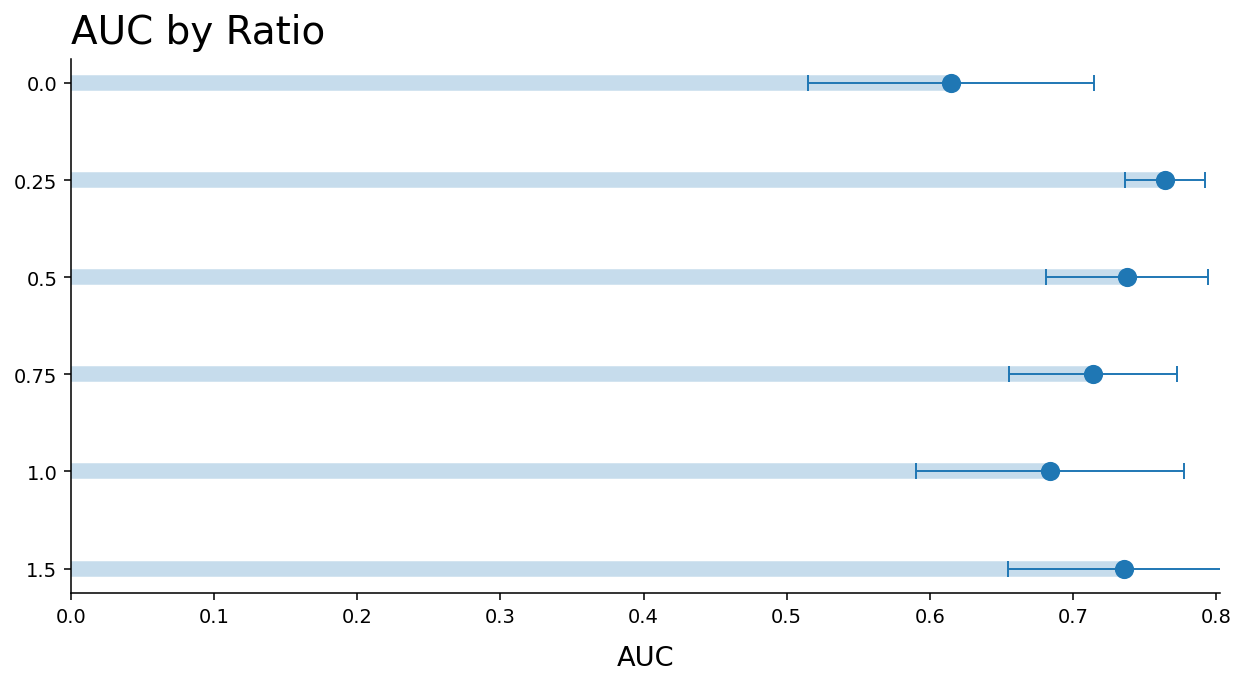

Saved: auc_by_ratio_lollipop.png | error=std


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _bootstrap_ci_mean(a, iters=2000, alpha=0.05, rng=None):
    rng = rng or np.random.default_rng(123)
    a = np.asarray(a, dtype=float)
    a = a[~np.isnan(a)]
    if len(a) == 0:
        return np.nan, np.nan
    means = [rng.choice(a, size=len(a), replace=True).mean() for _ in range(iters)]
    lo = np.percentile(means, 100*alpha/2)
    hi = np.percentile(means, 100*(1 - alpha/2))
    return float(lo), float(hi)

def plot_auc_lollipop_by_ratio(df_all, col_ratio="ratio", col_auc="auc",
                               error=None, title="AUC by Ratio",
                               xlabel="AUC", fname="auc_by_ratio_lollipop.png"):
    # 1) filtrar ratios numéricos e ordenar
    tmp = df_all.copy()
    tmp["_ratio_num"] = pd.to_numeric(tmp[col_ratio], errors="coerce")
    tmp = tmp.dropna(subset=["_ratio_num"])
    ratios_sorted = sorted(tmp["_ratio_num"].unique())
    y = np.arange(len(ratios_sorted))

    # 2) agregar por ratio
    means, errs = [], []
    for r in ratios_sorted:
        vals = tmp.loc[tmp["_ratio_num"] == r, col_auc].astype(float).dropna().values
        m = float(np.mean(vals)) if len(vals) else np.nan
        means.append(m)
        if error == "std":
            e = float(np.std(vals, ddof=1)) if len(vals) > 1 else 0.0
        elif error == "ci":
            lo, hi = _bootstrap_ci_mean(vals)
            e = (hi - lo) / 2.0
        else:
            e = 0.0
        errs.append(e)

    # 3) figura
    fig, ax = plt.subplots(figsize=(9, 5), dpi=140)

    # linhas horizontais (barras suaves)
    for yi, m in zip(y, means):
        ax.hlines(y=yi, xmin=0, xmax=m, linewidth=8, alpha=0.25)

    # pontos no final
    ax.scatter(means, y, s=70, linewidths=1.5)

    # erro opcional
    if error is not None:
        ax.errorbar(means, y, xerr=errs, fmt="none", capsize=4, linewidth=1)

    # eixos e estética
    ax.set_yticks(y)
    ax.set_yticklabels([str(r) for r in ratios_sorted])
    ax.set_xlabel(xlabel, fontsize=14, labelpad=10)
    ax.set_title(title, fontsize=20, loc="left", pad=8)

    # sem grid vertical nem horizontal
    ax.grid(False)

    # remover spines
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    # inverter eixo y (0 no topo)
    ax.invert_yaxis()

    # margem à direita
    xmax = np.nanmax(means)
    ax.set_xlim(left=0, right=xmax * 1.05)

    plt.tight_layout()
    plt.savefig(fname, bbox_inches="tight")
    plt.show()
    print(f"Saved: {fname} | error={error}")

# Exemplo de uso:
plot_auc_lollipop_by_ratio(df_all, error="std")
# plot_auc_lollipop_by_ratio(df_all, error=None)


# Rodando várias vezes (Balanceado)

In [68]:
import numpy as np
import pandas as pd
import torch
import time
import os, random

def _seed_everything(seed: int):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def run_k_times_balance(
    k: int,
    train_dataset,
    test_dataset,
    make_generator0_fn,   # -> G_class0 (nn.Module)
    latent_dim: int,
    step_ratio: float = 0.25,
    batch_size: int = 64,
    epochs: int = 5,
    device: str | None = None
):
    device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
    all_runs = []
    elapsed_times = []  # <-- novo

    print(f"\n=== Iniciando {k} rodadas (BALANCEADO classe 0) ===")
    start_global = time.time()

    for run_id in range(1, k + 1):
        run_start = time.time()
        print("\n" + "="*70)
        print(f"== Rodada {run_id}/{k}")
        print("="*70)

        # 1) Treinar/carregar gerador da classe 0 desta rodada
        G_class0 = make_generator0_fn(run_id)

        # 2) Executar experimento balanceado
        df_k = balance_class0_experiment(
            train_dataset=train_dataset,
            test_dataset=test_dataset,
            G_class0=G_class0,
            latent_dim=latent_dim,
            step_ratio=step_ratio,
            epochs=epochs,
            batch_size=batch_size,
            device=device
        )
        df_k["run_id"] = run_id
        all_runs.append(df_k)

        # liberar memória
        del G_class0
        if device == 'cuda':
            torch.cuda.empty_cache()

        # 3) Tempos/estimativas (corrigido)
        elapsed = time.time() - run_start
        elapsed_times.append(elapsed)
        avg_time = float(np.mean(elapsed_times))
        remaining = avg_time * (k - run_id)
        print(f"⏱️  Tempo da rodada {run_id}: {elapsed/60:.2f} min")
        print(f"🕐  Estimativa restante: {remaining/60:.2f} min ({(remaining/3600):.2f} h)")

    total_time = time.time() - start_global
    print("\n" + "="*70)
    print(f"✅ Todas as {k} rodadas (balanceado) concluídas.")
    print(f"⏱️  Tempo total: {total_time/60:.2f} min ({(total_time/3600):.2f} h)")
    print("="*70 + "\n")

    # 4) Concatena e agrega média/desvio por ratio
    df_all = pd.concat(all_runs, ignore_index=True)
    metrics_cols = ["acc","prec","rec","f1","auc","tn","fp","fn","tp",
                    "added_class0_synth_total","added_this_round"]
    agg = df_all.groupby("ratio").agg({m:["mean","std"] for m in metrics_cols if m in df_all.columns}).reset_index()
    agg.columns = ['_'.join(col).strip('_') for col in agg.columns.values]

    return df_all, agg


In [69]:
def make_generator0_fn_factory(train_loader, latent_dim: int, gan_epochs: int = 50, device: str | None = None):
    device = device or ('cuda' if torch.cuda.is_available() else 'cpu')

    def make_generator0_fn(run_id: int):
        seed = 2000 + run_id
        print(f"[GAN-0] Rodada {run_id}: treinando G_class0 do zero | seed={seed}")
        _seed_everything(seed)

        G0 = DCGenerator(latent_dim=latent_dim).to(device)
        D0 = DCDiscriminator(img_channels=1).to(device)
        G0 = train_gan_for_class(
            train_loader=train_loader,
            label_target=0,
            G=G0, D=D0,
            latent_dim=latent_dim,
            num_epochs=gan_epochs,
            device=device
        ).eval()
        return G0

    return make_generator0_fn


In [70]:
make_generator0_fn = make_generator0_fn_factory(
    train_loader=train_loader,
    latent_dim=latent_dim,
    gan_epochs=50,
    device=None
)

df_all_bal, df_summary_bal = run_k_times_balance(
    k=5,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    make_generator0_fn=make_generator0_fn,  # << só classe 0
    latent_dim=latent_dim,
    step_ratio=0.25,
    batch_size=64,
    epochs=5,
    device=None
)

print("\n=== resumo (média e desvio por ratio) — BALANCEADO ===")
print(df_summary_bal)



=== Iniciando 5 rodadas (BALANCEADO classe 0) ===

== Rodada 1/5
[GAN-0] Rodada 1: treinando G_class0 do zero | seed=2001
Epoch 1/50 - Loss D: 0.945 | Loss G: 1.159
Epoch 2/50 - Loss D: 0.403 | Loss G: 1.932
Epoch 3/50 - Loss D: 0.256 | Loss G: 2.407
Epoch 4/50 - Loss D: 0.172 | Loss G: 2.752
Epoch 5/50 - Loss D: 0.163 | Loss G: 2.913
Epoch 6/50 - Loss D: 0.152 | Loss G: 3.158
Epoch 7/50 - Loss D: 0.124 | Loss G: 3.176
Epoch 8/50 - Loss D: 0.190 | Loss G: 3.060
Epoch 9/50 - Loss D: 0.167 | Loss G: 3.088
Epoch 10/50 - Loss D: 0.158 | Loss G: 3.241
Epoch 11/50 - Loss D: 0.193 | Loss G: 3.328
Epoch 12/50 - Loss D: 0.197 | Loss G: 3.321
Epoch 13/50 - Loss D: 0.344 | Loss G: 2.879
Epoch 14/50 - Loss D: 0.246 | Loss G: 3.048
Epoch 15/50 - Loss D: 0.214 | Loss G: 2.746
Epoch 16/50 - Loss D: 0.642 | Loss G: 3.189
Epoch 17/50 - Loss D: 0.336 | Loss G: 2.538
Epoch 18/50 - Loss D: 0.356 | Loss G: 2.555
Epoch 19/50 - Loss D: 0.496 | Loss G: 2.349
Epoch 20/50 - Loss D: 0.384 | Loss G: 2.223
Epoch 

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.25: +315 (classe 0; sendo 252 p/ balancear + 63 extra) → total sintético classe0=315


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.50: +378 (classe 0; sendo 252 p/ balancear + 126 extra) → total sintético classe0=378


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.75: +441 (classe 0; sendo 252 p/ balancear + 189 extra) → total sintético classe0=441


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=1.00: +504 (classe 0; sendo 252 p/ balancear + 252 extra) → total sintético classe0=504


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


⏱️  Tempo da rodada 1: 0.79 min
🕐  Estimativa restante: 3.16 min (0.05 h)

== Rodada 2/5
[GAN-0] Rodada 2: treinando G_class0 do zero | seed=2002
Epoch 1/50 - Loss D: 1.008 | Loss G: 1.087
Epoch 2/50 - Loss D: 0.430 | Loss G: 1.939
Epoch 3/50 - Loss D: 0.264 | Loss G: 2.267
Epoch 4/50 - Loss D: 0.277 | Loss G: 2.338
Epoch 5/50 - Loss D: 0.236 | Loss G: 2.655
Epoch 6/50 - Loss D: 0.127 | Loss G: 3.215
Epoch 7/50 - Loss D: 0.089 | Loss G: 3.532
Epoch 8/50 - Loss D: 0.064 | Loss G: 3.773
Epoch 9/50 - Loss D: 0.050 | Loss G: 4.066
Epoch 10/50 - Loss D: 0.067 | Loss G: 3.754
Epoch 11/50 - Loss D: 0.171 | Loss G: 3.483
Epoch 12/50 - Loss D: 0.135 | Loss G: 3.186
Epoch 13/50 - Loss D: 0.145 | Loss G: 3.214
Epoch 14/50 - Loss D: 0.225 | Loss G: 2.908
Epoch 15/50 - Loss D: 0.338 | Loss G: 3.116
Epoch 16/50 - Loss D: 0.234 | Loss G: 3.149
Epoch 17/50 - Loss D: 0.177 | Loss G: 3.274
Epoch 18/50 - Loss D: 0.181 | Loss G: 3.392
Epoch 19/50 - Loss D: 0.171 | Loss G: 3.189
Epoch 20/50 - Loss D: 0.188

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.25: +315 (classe 0; sendo 252 p/ balancear + 63 extra) → total sintético classe0=315


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.50: +378 (classe 0; sendo 252 p/ balancear + 126 extra) → total sintético classe0=378


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.75: +441 (classe 0; sendo 252 p/ balancear + 189 extra) → total sintético classe0=441


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=1.00: +504 (classe 0; sendo 252 p/ balancear + 252 extra) → total sintético classe0=504


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


⏱️  Tempo da rodada 2: 0.79 min
🕐  Estimativa restante: 2.37 min (0.04 h)

== Rodada 3/5
[GAN-0] Rodada 3: treinando G_class0 do zero | seed=2003
Epoch 1/50 - Loss D: 1.010 | Loss G: 1.051
Epoch 2/50 - Loss D: 0.515 | Loss G: 1.652
Epoch 3/50 - Loss D: 0.357 | Loss G: 2.030
Epoch 4/50 - Loss D: 0.242 | Loss G: 2.437
Epoch 5/50 - Loss D: 0.239 | Loss G: 2.434
Epoch 6/50 - Loss D: 0.249 | Loss G: 2.665
Epoch 7/50 - Loss D: 0.183 | Loss G: 2.863
Epoch 8/50 - Loss D: 0.146 | Loss G: 3.012
Epoch 9/50 - Loss D: 0.153 | Loss G: 3.025
Epoch 10/50 - Loss D: 0.149 | Loss G: 3.083
Epoch 11/50 - Loss D: 0.151 | Loss G: 3.258
Epoch 12/50 - Loss D: 0.181 | Loss G: 3.012
Epoch 13/50 - Loss D: 0.185 | Loss G: 3.127
Epoch 14/50 - Loss D: 0.596 | Loss G: 2.418
Epoch 15/50 - Loss D: 0.430 | Loss G: 2.267
Epoch 16/50 - Loss D: 0.353 | Loss G: 2.177
Epoch 17/50 - Loss D: 0.594 | Loss G: 2.584
Epoch 18/50 - Loss D: 0.399 | Loss G: 2.373
Epoch 19/50 - Loss D: 0.385 | Loss G: 2.322
Epoch 20/50 - Loss D: 1.019

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.25: +315 (classe 0; sendo 252 p/ balancear + 63 extra) → total sintético classe0=315


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.50: +378 (classe 0; sendo 252 p/ balancear + 126 extra) → total sintético classe0=378


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.75: +441 (classe 0; sendo 252 p/ balancear + 189 extra) → total sintético classe0=441


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=1.00: +504 (classe 0; sendo 252 p/ balancear + 252 extra) → total sintético classe0=504


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


⏱️  Tempo da rodada 3: 0.77 min
🕐  Estimativa restante: 1.57 min (0.03 h)

== Rodada 4/5
[GAN-0] Rodada 4: treinando G_class0 do zero | seed=2004
Epoch 1/50 - Loss D: 0.894 | Loss G: 1.132
Epoch 2/50 - Loss D: 0.517 | Loss G: 1.740
Epoch 3/50 - Loss D: 0.377 | Loss G: 2.066
Epoch 4/50 - Loss D: 0.293 | Loss G: 2.264
Epoch 5/50 - Loss D: 0.255 | Loss G: 2.420
Epoch 6/50 - Loss D: 0.212 | Loss G: 2.645
Epoch 7/50 - Loss D: 0.188 | Loss G: 2.828
Epoch 8/50 - Loss D: 0.168 | Loss G: 3.027
Epoch 9/50 - Loss D: 0.169 | Loss G: 3.036
Epoch 10/50 - Loss D: 0.245 | Loss G: 3.092
Epoch 11/50 - Loss D: 0.188 | Loss G: 3.102
Epoch 12/50 - Loss D: 0.176 | Loss G: 3.008
Epoch 13/50 - Loss D: 0.220 | Loss G: 3.010
Epoch 14/50 - Loss D: 0.194 | Loss G: 3.275
Epoch 15/50 - Loss D: 0.246 | Loss G: 3.072
Epoch 16/50 - Loss D: 0.612 | Loss G: 2.776
Epoch 17/50 - Loss D: 0.463 | Loss G: 2.626
Epoch 18/50 - Loss D: 0.337 | Loss G: 2.565
Epoch 19/50 - Loss D: 0.353 | Loss G: 2.429
Epoch 20/50 - Loss D: 0.354

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.25: +315 (classe 0; sendo 252 p/ balancear + 63 extra) → total sintético classe0=315


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.50: +378 (classe 0; sendo 252 p/ balancear + 126 extra) → total sintético classe0=378


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.75: +441 (classe 0; sendo 252 p/ balancear + 189 extra) → total sintético classe0=441


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=1.00: +504 (classe 0; sendo 252 p/ balancear + 252 extra) → total sintético classe0=504


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


⏱️  Tempo da rodada 4: 0.79 min
🕐  Estimativa restante: 0.79 min (0.01 h)

== Rodada 5/5
[GAN-0] Rodada 5: treinando G_class0 do zero | seed=2005
Epoch 1/50 - Loss D: 0.900 | Loss G: 1.292
Epoch 2/50 - Loss D: 0.330 | Loss G: 2.139
Epoch 3/50 - Loss D: 0.182 | Loss G: 2.681
Epoch 4/50 - Loss D: 0.141 | Loss G: 2.905
Epoch 5/50 - Loss D: 0.103 | Loss G: 3.213
Epoch 6/50 - Loss D: 0.076 | Loss G: 3.579
Epoch 7/50 - Loss D: 0.050 | Loss G: 3.917
Epoch 8/50 - Loss D: 0.094 | Loss G: 3.641
Epoch 9/50 - Loss D: 0.098 | Loss G: 3.724
Epoch 10/50 - Loss D: 0.064 | Loss G: 3.875
Epoch 11/50 - Loss D: 0.153 | Loss G: 4.125
Epoch 12/50 - Loss D: 0.053 | Loss G: 4.300
Epoch 13/50 - Loss D: 0.038 | Loss G: 4.538
Epoch 14/50 - Loss D: 0.025 | Loss G: 4.632
Epoch 15/50 - Loss D: 0.019 | Loss G: 5.013
Epoch 16/50 - Loss D: 0.013 | Loss G: 5.385
Epoch 17/50 - Loss D: 0.012 | Loss G: 5.500
Epoch 18/50 - Loss D: 0.011 | Loss G: 5.476
Epoch 19/50 - Loss D: 0.010 | Loss G: 5.544
Epoch 20/50 - Loss D: 0.009

/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.25: +315 (classe 0; sendo 252 p/ balancear + 63 extra) → total sintético classe0=315


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.50: +378 (classe 0; sendo 252 p/ balancear + 126 extra) → total sintético classe0=378


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=0.75: +441 (classe 0; sendo 252 p/ balancear + 189 extra) → total sintético classe0=441


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


ratio=1.00: +504 (classe 0; sendo 252 p/ balancear + 252 extra) → total sintético classe0=504


/tmp/ipykernel_1197133/271428978.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val = int(y)


⏱️  Tempo da rodada 5: 0.79 min
🕐  Estimativa restante: 0.00 min (0.00 h)

✅ Todas as 5 rodadas (balanceado) concluídas.
⏱️  Tempo total: 3.94 min (0.07 h)


=== resumo (média e desvio por ratio) — BALANCEADO ===
   ratio  acc_mean   acc_std  prec_mean  prec_std  rec_mean   rec_std  \
0   0.00  0.833333  0.023553   0.883815  0.020721  0.889474  0.033171   
1   0.25  0.825641  0.024156   0.853149  0.038576  0.922807  0.020003   
2   0.50  0.835897  0.021066   0.874571  0.030238  0.908772  0.068117   
3   0.75  0.793590  0.042376   0.889643  0.035721  0.824561  0.103976   
4   1.00  0.791026  0.025074   0.861813  0.077858  0.868421  0.110436   

    f1_mean    f1_std  auc_mean  ...  fp_mean     fp_std  fn_mean     fn_std  \
0  0.886220  0.017046  0.785213  ...     13.4   2.880972     12.6   3.781534   
1  0.885836  0.012141  0.742356  ...     18.4   5.899152      8.8   2.280351   
2  0.889212  0.020520  0.773434  ...     15.2   4.969909     10.4   7.765307   
3  0.851231  0.042561  0.767

In [72]:
df_summary_bal

,ratio,acc_mean,acc_std,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std,auc_mean,...,fp_mean,fp_std,fn_mean,fn_std,tp_mean,tp_std,added_class0_synth_total_mean,added_class0_synth_total_std,added_this_round_mean,added_this_round_std
0,0.00,0.833333,0.023553,0.883815,0.020721,0.889474,0.033171,0.886220,0.017046,0.785213,...,13.4,2.880972,12.6,3.781534,101.4,3.781534,252.0,0.0,252.0,0.0
1,0.25,0.825641,0.024156,0.853149,0.038576,0.922807,0.020003,0.885836,0.012141,0.742356,...,18.4,5.899152,8.8,2.280351,105.2,2.280351,315.0,0.0,315.0,0.0
2,0.50,0.835897,0.021066,0.874571,0.030238,0.908772,0.068117,0.889212,0.020520,0.773434,...,15.2,4.969909,10.4,7.765307,103.6,7.765307,378.0,0.0,378.0,0.0
3,0.75,0.793590,0.042376,0.889643,0.035721,0.824561,0.103976,0.851231,0.042561,0.767043,...,12.2,5.848077,20.0,11.853270,94.0,11.853270,441.0,0.0,441.0,0.0
4,1.00,0.791026,0.025074,0.861813,0.077858,0.868421,0.110436,0.856978,0.026879,0.724687,...,17.6,11.886968,15.0,12.589678,99.0,12.589678,504.0,0.0,504.0,0.0


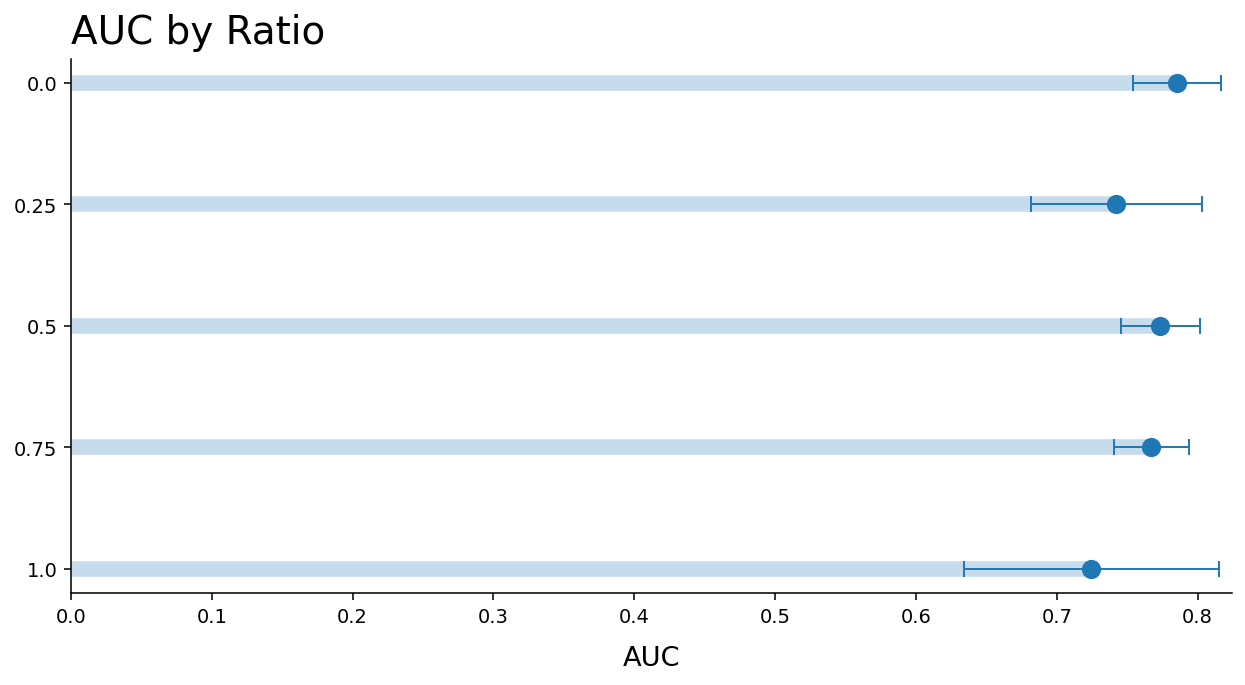

Saved: auc_by_ratio_lollipop.png | error=std


In [79]:
plot_auc_lollipop_by_ratio(df_all_bal, error="std")
